# Test 1: N-Gram Similarity

<font size = 4px>1. Function to split words into list of characters</font>

In [3]:
def splitChar(word):
    characters = []
    for char in word:
        characters.append(char)
    return characters


<font size = 4px>2. Function to convert word into n-gram format</font>

In [4]:
def splitGram(word, n):
    char = splitChar(word)

    ngrams = zip(*[char[i:] for i in range(n)])
    ngrams = [''.join(ngram) for ngram in ngrams]
    return ngrams


<font size = 4px>3. Function to determine the average n-gram similarity for 2 N values</font>

In [5]:
def ngramSimilarity(word1, word2, n1, n2):
    ngramSet1 = set(splitGram(word1, n1))
    ngramSet2 = set(splitGram(word2, n1))
    
    intersec = ngramSet1 & ngramSet2
    union = ngramSet1 | ngramSet2
    value1 = len(intersec)/len(union)
    
    ngramSet1 = set(splitGram(word1, n2))
    ngramSet2 = set(splitGram(word2, n2))
    
    intersec = ngramSet1 & ngramSet2
    union = ngramSet1 | ngramSet2
    value2 = len(intersec)/len(union)
    
    return (value1+value2)/2


<font size = 4px>4. Importing pandas data from Excel file</font>

In [6]:
import pandas as pd

df = pd.read_excel("TaskData.xlsx", header=None, names=['Careers'], dtype={'Careers':'object'})
df['Careers']=df['Careers'].str.upper() # Uppercased the data to ignore case different mearasures

valid_careers = ['ENGINEER', 'NURSE', 'DOCTOR', 'DENTIST', 'TEACHER', 'LAWYER', 'POLICE', 'ARCHITECT', 'ACCOUNTANT', 'PHARMACIST']

In [7]:
df.head(5)

,Careers
0,COKTER
1,DENTIISTS
2,ENGINIR
3,POLICE
4,ENGNEIEAR


<font size = 4px>5. This 'for' loop iterates over the dataset of misspelled careers and compares with the valid careers to find the closest match using the average n-gram similarity value (idx). The higher the value of idx, the more similar it is.</font>

In [8]:
#Initialising n1 & n2
n1=2
n2=1

i=0  #This i takes care of the row index of misspelled career data set
for career in df['Careers']:
    maxi=-1  # Maximum value of NGS associate with each career data initialised to -1
    for index in range(len(valid_careers)):
        idx = ngramSimilarity(career, valid_careers[index], n1, n2)
        # Get the valid career for which idx is maximum
        if idx>maxi:
            maxi=idx
            expected=valid_careers[index]

    df.at[i, 'Careers']=expected  # Assign the corrected spelling to the Careers column
    i+=1



In [9]:
df.head(5)

,Careers
0,TEACHER
1,DENTIST
2,ENGINEER
3,POLICE
4,ENGINEER


In [10]:
df.to_excel("TaskData.xlsx", index=False) # Export the corrected spelling in the Excel file

In [11]:
career_counts = df['Careers'].value_counts()  # Calculate the frequency of each career

<font size=4 px>6. Plot the frequency of each career in a bar chart using mtplotlib</font>

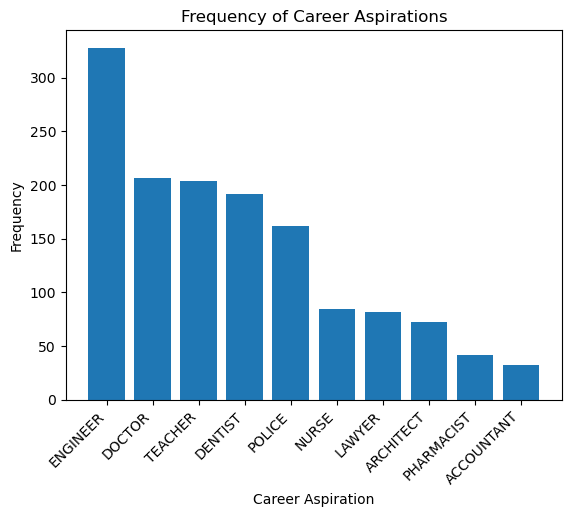

In [12]:
import matplotlib.pyplot as plt

plt.bar(career_counts.index, career_counts.values) # Plot the bar chart in decreasing order

# Label x & y axis and give a title to the plot
plt.xlabel("Career Aspiration")
plt.ylabel("Frequency")
plt.title("Frequency of Career Aspirations")

plt.xticks(rotation=45, ha='right')  # Rotate x-labels by 45 deg for better readability
plt.show()